In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

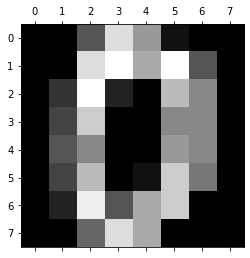

In [21]:
plt.gray()
# for i in range(6):
plt.matshow(digits.images[0])

In [22]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.2)

In [25]:
len(X_train)


1437

In [26]:
len(X_test)


360

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=80000)

In [44]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=80000)

In [45]:
model.score(X_test, y_test)

0.9722222222222222

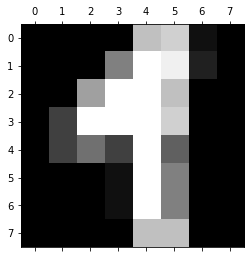

In [46]:
plt.matshow(digits.images[56])

In [47]:
digits.target[56]

1

In [49]:
model.predict([digits.data[56]])

array([1])

In [50]:
model.predict([digits.data[0]])

array([0])

In [51]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predicted)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 41,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

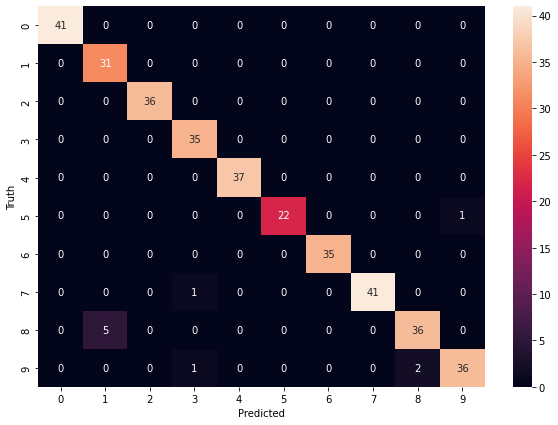

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
import pickle
filename = 'LrMulticlassClassifier_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9722222222222222
